In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
conn = sqlite3.connect('../exp_k_k_prime_uniform.db')

In [22]:
query = """
    SELECT map, n, AVG(k_) as ratio FROM results
    WHERE k=16 AND map NOT LIKE 'lab_refined%'
    GROUP BY map, n
"""

In [23]:
df = pd.read_sql_query(query, conn)
df.head()

,map,n,ratio
0,checkpoint.poly,1,15.62
1,checkpoint.poly,2,15.94
2,checkpoint.poly,4,15.51
3,checkpoint.poly,8,14.90
4,checkpoint.poly,16,11.87


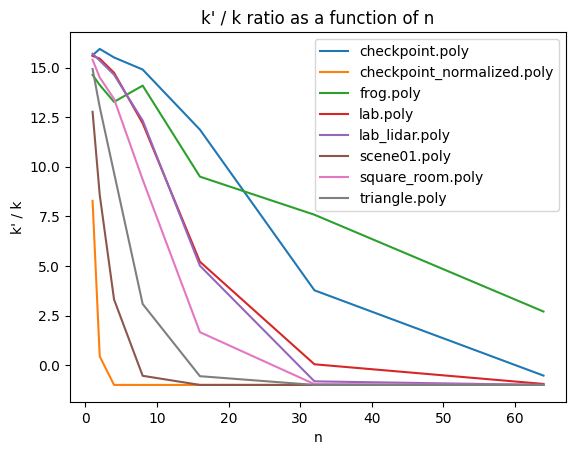

In [24]:
# Plot a line chart of ratio as a function of n, for each map (each map is different color line)
plt.figure()
for map_name, group in df.groupby('map'):
    plt.plot(group['n'], group['ratio'], label=map_name)
plt.legend()
plt.xlabel('n')
plt.ylabel('k\' / k')
plt.title('k\' / k ratio as a function of n')
plt.show()